# Spark SQL and ODBC

Spark allows for ODBC connections via the thrift server


https://spark.apache.org/docs/latest/sql-distributed-sql-engine.html
> Spark SQL can also act as a distributed query engine using its JDBC/ODBC or command-line interface. In this mode, end-users or applications can interact with Spark SQL directly to run SQL queries, without the need to write any code.

In the spark stack, I've setup a thrift server under service(spark-thrift) the Thrift server is a JDBC/ODBC server that allows clients to execute Hive queries using a JDBC or ODBC driver.





## Setup ODBC Connection

### If you're on Windows, this is what your connection might look like.
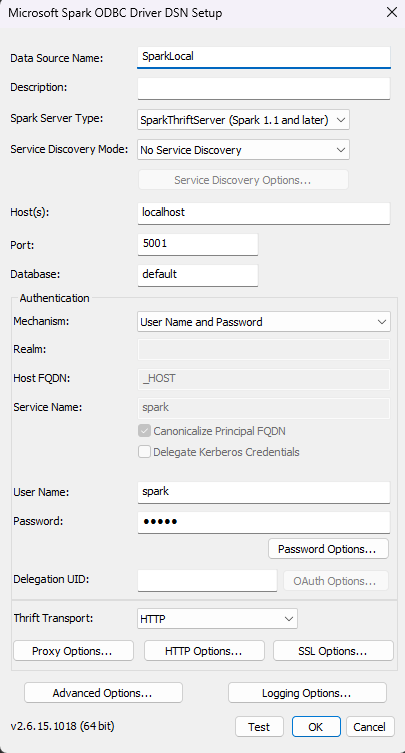

- The username and password can be anything, as long as it's not blank
- HTTP Options -> http path to cliservice
- SSL Options -> Uncheck SSL verify


## Let's connect to the thrift server and run some queries

In [8]:
import pyodbc

# Replace 'YourDSNName' with the name of your DSN
# Replace 'YourUsername' and 'YourPassword' with your credentials, if required
conn_str = "DSN=SparkLocal;Database=default"
conn = pyodbc.connect(conn_str, autocommit=True)


In [9]:
cursor = conn.cursor()
cursor.execute("select 42")
cursor.close()


In [10]:
# Execute a SQL command
cursor = conn.cursor()

cursor.execute("""
show tables
               """)
# Fetch and print the results
for row in cursor:
    print(row)

cursor.close()

In [11]:
# Execute a SQL command
cursor = conn.cursor()

cursor.execute("""
drop TABLE if  exists my_rate_table_delta 
               """)

cursor.execute("""
CREATE TABLE my_rate_table_delta
               using delta
               location '/opt/bitnami/spark/spark-warehouse/my_rate_table_delta'
               """)
cursor.execute("show tables in default")

# Fetch and print the results
for row in cursor:
    print(row)

cursor.close()

('default', 'my_rate_table_delta', False)


In [4]:
cursor = conn.cursor()

cursor.execute("select * from default.my_rate_table_delta")


# Fetch and print the results
for row in cursor:
    print(row)

cursor.close()

(datetime.datetime(2024, 2, 16, 7, 2, 57, 978000), 20)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 878000), 29)
(datetime.datetime(2024, 2, 16, 7, 2, 59, 78000), 31)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 378000), 24)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 178000), 22)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 178000), 12)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 478000), 25)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 678000), 27)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 778000), 28)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 878000), 19)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 578000), 16)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 278000), 23)
(datetime.datetime(2024, 2, 16, 7, 2, 56, 778000), 8)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 578000), 26)
(datetime.datetime(2024, 2, 16, 7, 2, 58, 78000), 21)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 678000), 17)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 78000), 11)
(datetime.datetime(2024, 2, 16, 7, 2, 57, 278000), 13)
(datetime.date

## Using ODBC you can connect your favorite BI tool to local spark cluster